# Final Project 1 - Linear Regression

Develop by :
- Kevin Anggara Putra
- Daniel Leksono
- Ines Savitri

### Data Overview:
[Referensi : Uber and Lyft Dataset Boston, MA]

- id : Unique identifier for each column
- timestamp : Unix timestamp
- hour : Hour of the day
- day : Day of the week
- month : Month in a year
- datetime : Date value
- timezone : Timezone
- source : Initial source of the ride
- destination : Destination of the ride
- cab_type : The type of cab
- price : Price of the ride
- distance : Total distance of the requested ride
- surge_multiplier : Times of the normal price
- temperature : Temperature of the ride
- apparentTemperature : Apparent temperatur of the ride
- summary : Weather report summary of the day
- humidity : Humidity of the ride
- windSpeed : Wind speed of the ride
- windGust : Wind gust of the ride
- uvIndex : UV index of the ride

Data yang akan digunakan pada analisis ini adalah Data Uber

**Import Library**

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats
import operator
from datetime import date

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder()

**Load Dataset**

In [2]:
# Download Datasets
df = pd.read_csv('rideshare_kaggle.csv')

df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
# Mengetahui jumlah data dan kolom
df.shape

(693071, 57)

Dari ouput di atas, dapat kita ketahui seluruh data berjumlah 57 kolom dan 693.071 baris

In [4]:
# Cleansing data dengan standar missing value
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Dari output di atas dapat kita ketahui bahwa pada kolom 'price' terdapat missing value sebanyak 55.095, maka data harus dibersihkan

In [5]:
#Melihat infromasi tipe-tipe data tiap kolom pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [6]:
for col in df.columns :
  print(col, 'Unique Value')
  print(df[col].unique())
  print('-'*100)

id Unique Value
['424553bb-7174-41ea-aeb4-fe06d4f4b9d7'
 '4bd23055-6827-41c6-b23b-3c491f24e74d'
 '981a3613-77af-4620-a42a-0c0866077d1e' ...
 '64d451d0-639f-47a4-9b7c-6fd92fbd264f'
 '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e'
 'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda']
----------------------------------------------------------------------------------------------------
timestamp Unique Value
[1.54495261e+09 1.54328402e+09 1.54336682e+09 ... 1.54377528e+09
 1.54507051e+09 1.54473900e+09]
----------------------------------------------------------------------------------------------------
hour Unique Value
[ 9  2  1  4  3 18  5 19  6 10 16 22 23  0 14 11  7 20 13  8 12 21 17 15]
----------------------------------------------------------------------------------------------------
day Unique Value
[16 27 28 30 29 17 26  2  3 13 14  1 18 15  4 10  9]
----------------------------------------------------------------------------------------------------
month Unique Value
[12 11]
--------------------------

In [7]:
# Mengetahui korelasi antar data

corr_mat = df.corr(method='pearson')
  
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()

print(sorted_mat)

month                        day                   -0.861306
moonPhase                    windGustTime          -0.854560
                             timestamp             -0.846203
apparentTemperatureMinTime   moonPhase             -0.845925
temperatureMaxTime           moonPhase             -0.845208
                                                      ...   
apparentTemperatureHighTime  temperatureHighTime    0.999986
uvIndexTime                  sunriseTime            0.999997
                             sunsetTime             0.999997
sunsetTime                   sunriseTime            1.000000
visibility.1                 visibility             1.000000
Length: 1035, dtype: float64


C:\Users\vin16\AppData\Local\Temp\ipykernel_8244\3664429517.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))


In [8]:
df.corr()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.028004,-0.341292,0.771182,0.000808,0.003553,0.000572,0.168130,-0.136802,-0.248748,...,-0.211700,0.999364,-0.306971,0.998194,-0.186328,0.999290,-0.378346,0.998286,-0.157748,0.999276
hour,-0.028004,1.000000,0.066090,-0.079379,0.000561,0.002280,-0.000077,0.019493,-0.006295,0.218769,...,0.019940,-0.027518,0.015513,-0.027027,0.002958,-0.027990,0.015820,-0.027704,0.002897,-0.027785
day,-0.341292,0.066090,1.000000,-0.861306,-0.000722,-0.000627,0.001389,0.006838,0.078690,-0.084116,...,0.145568,-0.341198,0.038076,-0.333990,-0.304870,-0.344532,-0.019940,-0.335043,-0.444445,-0.344411
month,0.771182,-0.079379,-0.861306,1.000000,0.000913,0.002298,-0.000628,0.085791,-0.126912,-0.081774,...,-0.213054,0.770767,-0.191803,0.765255,0.105326,0.772989,-0.191153,0.766031,0.215076,0.772896
price,0.000808,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,...,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.003553,0.002280,-0.000627,0.002298,0.345061,1.000000,0.024769,0.000819,-0.000293,-0.002884,...,0.000648,0.003562,-0.003396,0.003428,-0.004191,0.003580,-0.003937,0.003526,-0.004238,0.003584
surge_multiplier,0.000572,-0.000077,0.001389,-0.000628,0.240458,0.024769,1.000000,0.001375,-0.001829,-0.001572,...,-0.000101,0.000544,-0.000724,0.000554,-0.001951,0.000522,-0.001304,0.000464,-0.002154,0.000519
latitude,0.168130,0.019493,0.006838,0.085791,0.002088,0.000819,0.001375,1.000000,-0.531259,-0.098604,...,-0.047535,0.171820,-0.114185,0.169592,-0.108953,0.175177,-0.096084,0.170921,-0.082600,0.173206
longitude,-0.136802,-0.006295,0.078690,-0.126912,-0.001417,-0.000293,-0.001829,-0.531259,1.000000,0.012183,...,0.030753,-0.136724,0.048723,-0.140403,-0.007274,-0.137041,0.010138,-0.140518,-0.022854,-0.135621
temperature,-0.248748,0.218769,-0.084116,-0.081774,-0.000084,-0.002884,-0.001572,-0.098604,0.012183,1.000000,...,0.333081,-0.254467,0.789261,-0.242698,0.780546,-0.253881,0.817521,-0.231513,0.703208,-0.255288


## **DATA CLEANING PROCESS**

In [9]:
#Select column yang dibutuhkan
rsdf = df[['timestamp','hour','day','month','datetime','source','destination','cab_type','product_id','name','price','distance','surge_multiplier','temperature','short_summary','long_summary','icon','visibility','temperatureHigh','temperatureLow','apparentTemperatureHigh','apparentTemperatureLow','latitude','longitude']].copy()
#data = df[['day', 'month', 'datetime', 'source', 'destination', 'cab_type', 'name', 'price', 'distance']]
rsdf

,timestamp,hour,day,month,datetime,source,destination,cab_type,product_id,name,...,short_summary,long_summary,icon,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,latitude,longitude
0,1.544953e+09,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night,10.000,43.68,34.19,37.95,27.39,42.2148,-71.0330
1,1.543284e+09,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,Rain,"Rain until morning, starting again in the eve...",rain,4.786,47.30,42.10,43.92,36.20,42.2148,-71.0330
2,1.543367e+09,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,lyft,Lyft,...,Clear,Light rain in the morning.,clear-night,10.000,47.55,33.10,44.12,29.11,42.2148,-71.0330
3,1.543554e+09,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,Clear,Partly cloudy throughout the day.,clear-night,10.000,45.03,28.90,38.53,26.20,42.2148,-71.0330
4,1.543463e+09,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night,10.000,42.18,36.71,35.75,30.29,42.2148,-71.0330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night,9.785,44.76,34.83,44.09,35.48,42.3519,-71.0643
693067,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night,9.785,44.76,34.83,44.09,35.48,42.3519,-71.0643
693068,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,...,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night,9.785,44.76,34.83,44.09,35.48,42.3519,-71.0643
693069,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night,9.785,44.76,34.83,44.09,35.48,42.3519,-71.0643


In [10]:
rsdf.isna().any()

timestamp                  False
hour                       False
day                        False
month                      False
datetime                   False
source                     False
destination                False
cab_type                   False
product_id                 False
name                       False
price                       True
distance                   False
surge_multiplier           False
temperature                False
short_summary              False
long_summary               False
icon                       False
visibility                 False
temperatureHigh            False
temperatureLow             False
apparentTemperatureHigh    False
apparentTemperatureLow     False
latitude                   False
longitude                  False
dtype: bool

In [11]:
rsdf['price']=rsdf['price'].fillna(rsdf['distance']*1.45)

In [12]:
rsdf['source'].value_counts()

Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: source, dtype: int64

In [13]:
rsdf['destination'].value_counts()

Financial District         58851
Theatre District           57798
Back Bay                   57780
Haymarket Square           57764
Boston University          57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: destination, dtype: int64

In [14]:
rsdf["datetime"] = pd.to_datetime(rsdf["datetime"])
type(rsdf["datetime"])

pandas.core.series.Series

In [15]:
rsdf['days name']=rsdf['datetime'].dt.day_name()

In [16]:
rsdf['time of drive'] = np.where(operator.and_(rsdf['hour'] >= 5,rsdf['hour']<12), 'Moring', (np.where(operator.and_(rsdf['hour'] >= 12,rsdf['hour']<17), 'Noon', (np.where(operator.and_(rsdf['hour'] >= 17,rsdf['hour']<22), 'Evening','Night')))))

In [17]:
rsdf

,timestamp,hour,day,month,datetime,source,destination,cab_type,product_id,name,...,icon,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,latitude,longitude,days name,time of drive
0,1.544953e+09,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,partly-cloudy-night,10.000,43.68,34.19,37.95,27.39,42.2148,-71.0330,Sunday,Moring
1,1.543284e+09,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,rain,4.786,47.30,42.10,43.92,36.20,42.2148,-71.0330,Tuesday,Night
2,1.543367e+09,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,lyft,Lyft,...,clear-night,10.000,47.55,33.10,44.12,29.11,42.2148,-71.0330,Wednesday,Night
3,1.543554e+09,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,clear-night,10.000,45.03,28.90,38.53,26.20,42.2148,-71.0330,Friday,Night
4,1.543463e+09,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,partly-cloudy-night,10.000,42.18,36.71,35.75,30.29,42.2148,-71.0330,Thursday,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,partly-cloudy-night,9.785,44.76,34.83,44.09,35.48,42.3519,-71.0643,Saturday,Night
693067,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,partly-cloudy-night,9.785,44.76,34.83,44.09,35.48,42.3519,-71.0643,Saturday,Night
693068,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,...,partly-cloudy-night,9.785,44.76,34.83,44.09,35.48,42.3519,-71.0643,Saturday,Night
693069,1.543708e+09,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,partly-cloudy-night,9.785,44.76,34.83,44.09,35.48,42.3519,-71.0643,Saturday,Night


In [18]:
rsdf.isnull().sum()

timestamp                  0
hour                       0
day                        0
month                      0
datetime                   0
source                     0
destination                0
cab_type                   0
product_id                 0
name                       0
price                      0
distance                   0
surge_multiplier           0
temperature                0
short_summary              0
long_summary               0
icon                       0
visibility                 0
temperatureHigh            0
temperatureLow             0
apparentTemperatureHigh    0
apparentTemperatureLow     0
latitude                   0
longitude                  0
days name                  0
time of drive              0
dtype: int64

In [19]:
rideshare =  rsdf
rideshare.head()

,timestamp,hour,day,month,datetime,source,destination,cab_type,product_id,name,...,icon,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,latitude,longitude,days name,time of drive
0,1.544953e+09,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,partly-cloudy-night,10.000,43.68,34.19,37.95,27.39,42.2148,-71.033,Sunday,Moring
1,1.543284e+09,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,rain,4.786,47.30,42.10,43.92,36.20,42.2148,-71.033,Tuesday,Night
2,1.543367e+09,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,lyft,Lyft,...,clear-night,10.000,47.55,33.10,44.12,29.11,42.2148,-71.033,Wednesday,Night
3,1.543554e+09,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,clear-night,10.000,45.03,28.90,38.53,26.20,42.2148,-71.033,Friday,Night
4,1.543463e+09,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,partly-cloudy-night,10.000,42.18,36.71,35.75,30.29,42.2148,-71.033,Thursday,Night


## Uber data

In [20]:
uber_data = rideshare[rideshare['cab_type']=='Uber']
uber_data = uber_data.reset_index()
uber_data = uber_data.iloc[:,1:]
uber_data.head()

,timestamp,hour,day,month,datetime,source,destination,cab_type,product_id,name,...,icon,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,latitude,longitude,days name,time of drive
0,1.543616e+09,22,30,11,2018-11-30 22:13:01,North End,West End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,cloudy,9.833,42.52,31.71,40.53,28.06,42.3647,-71.0542,Friday,Night
1,1.544698e+09,10,13,12,2018-12-13 10:50:11,North End,West End,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,...,clear-night,9.831,33.83,27.27,32.85,24.61,42.3647,-71.0542,Thursday,Moring
2,1.544729e+09,19,13,12,2018-12-13 19:15:03,North End,West End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,partly-cloudy-day,9.959,33.83,27.27,32.85,24.61,42.3647,-71.0542,Thursday,Evening
3,1.545005e+09,23,16,12,2018-12-16 23:55:11,North End,West End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,rain,4.054,43.83,34.25,38.38,28.30,42.3647,-71.0542,Sunday,Night
4,1.544748e+09,0,14,12,2018-12-14 00:40:07,North End,West End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,cloudy,10.000,33.83,27.27,32.85,24.61,42.3647,-71.0542,Friday,Night


## Data Visualization

<AxesSubplot: xlabel='short_summary', ylabel='price'>

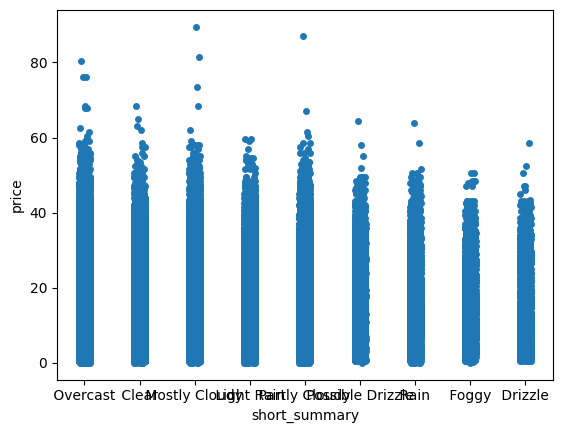

In [21]:
sns.stripplot(data=uber_data, x='short_summary', y='price')

Dari output diatas dapat kita ketahui pada saat kondisi 'Overcast' mencapai 'price' sebesar 80 dolar dan kondisi tersebut paling banyak di pesan oleh pengguna Uber.

<AxesSubplot: xlabel='price', ylabel='destination'>

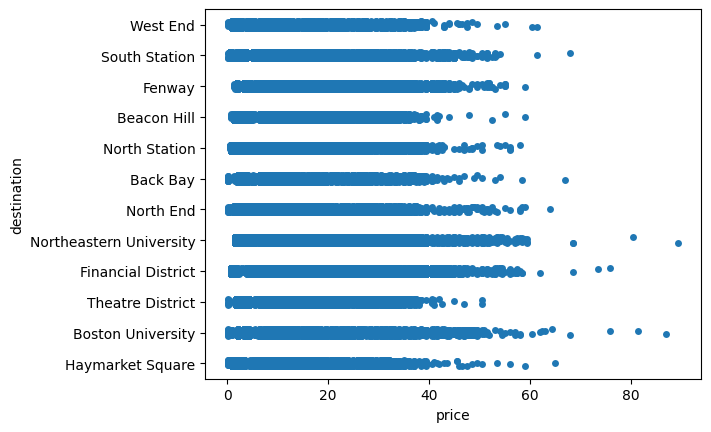

In [25]:
sns.stripplot(data=uber_data, y ='destination', x ='price' )

Dari output di atas dapat kita ketahui titik destinasi mana yang paling banyak dipesan dan akan mempengaruhi harganya,
Contoh, kita dapat melihat tiga titik destinasi terbanyak yang paling sering digunakan pengguna adalah 'Northeastern University', 'Financial District', dan 'Boston University'  

<AxesSubplot: xlabel='price', ylabel='name'>

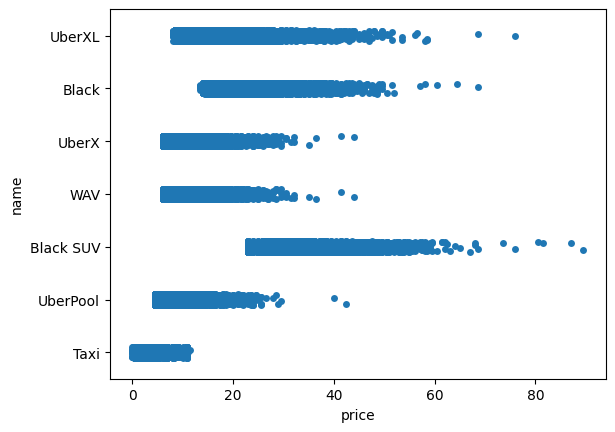

In [26]:
sns.stripplot(data=uber_data, y = 'name', x = 'price')

Dari output di atas dapat kita ketahui banyaknya pelanggan yang menggunakan tipe kategori kendaraan dan akan mempengaruhi harganya,
Contoh, kita dapat mengetahui pengguna kendaraan pada kategori 'Black SUV' membayar paling mahal dari pada kategori lainnya dan membayar paling sedikit pada kendaraan kategori 'Taxi'.

<AxesSubplot: xlabel='price', ylabel='hour'>

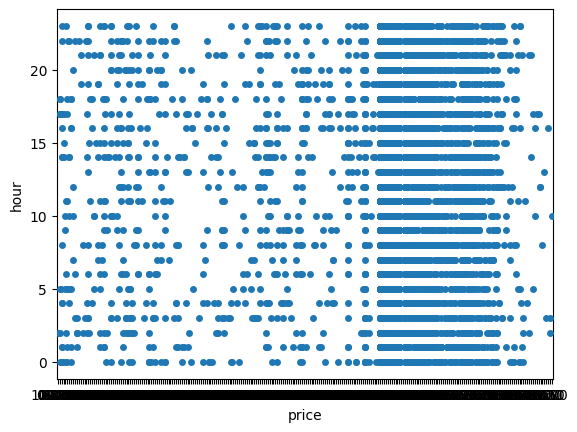

In [28]:
sns.stripplot(data=uber_data[:5000], y = 'hour', x = 'price')

Dari output di atas dapat kita ketahui bahwa pelanggan banyak yang memesan Uber pada jam 10 sampai dengan jam 16, jika kita membandingkan dari data yang lain berdasarkan price nya.

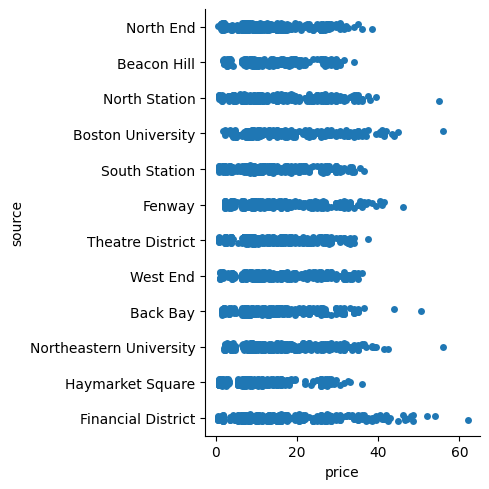

In [30]:
sns.catplot(data=uber_data[:5000], x = 'price', y = 'source')

Dari output di atas dapat kita ketahui bahwa titik keberangkatan 

In [31]:
final_uber_data = uber_data[['source','destination','name','short_summary','temperature','month','hour','price']]

In [32]:
final_uber_data['source']=label_encoder.fit_transform(final_uber_data['source'])
final_uber_data['destination']=label_encoder.fit_transform(final_uber_data['destination'])
final_uber_data['name']=label_encoder.fit_transform(final_uber_data['name'])
final_uber_data['short_summary']=label_encoder.fit_transform(final_uber_data['short_summary'])
final_uber_data['temperature']=label_encoder.fit_transform(final_uber_data['temperature'])

C:\Users\vin16\AppData\Local\Temp\ipykernel_8244\1597745000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_uber_data['source']=label_encoder.fit_transform(final_uber_data['source'])
C:\Users\vin16\AppData\Local\Temp\ipykernel_8244\1597745000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_uber_data['destination']=label_encoder.fit_transform(final_uber_data['destination'])
C:\Users\vin16\AppData\Local\Temp\ipykernel_8244\1597745000.py:3: SettingWithCopyWarning: 
A value is trying to be s

In [33]:
x=final_uber_data.iloc[:,:-1] # features
y=final_uber_data.iloc[:,-1] # price
x.shape,y.shape

((385663, 7), (385663,))

In [34]:
# Import
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Tambahkan variabel
x=final_uber_data.iloc[:,:-1]
y=final_uber_data.iloc[:,-1]

In [35]:
# Split data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [36]:
# Persentase data
print('{0:0.2f}% ada pada data pelatihan'.format((len(X_train)/len(df.index)) * 100))
print('{0:0.2f}% ada pada data pengujian'.format((len(X_test)/len(df.index)) * 100))

44.52% ada pada data pelatihan
11.13% ada pada data pengujian


In [37]:
# Menerapkan model pada data pelatihan
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [38]:
y_train.shape

(308530,)

In [ ]:
#poly=PolynomialFeatures(5)
#x=poly.fit_transform(X_train)
#linear = LinearRegression()
#linear.fit(x, y_train)
#y_pred1 = linear.predict(x)
#r2_score(y_train, y_pred1)

In [ ]:
#x_tes=poly.fit_transform(X_test)
#y_pred2=linear.predict(x_tes)
#r2_score(y_test, y_pred2)

In [39]:
model = LinearRegression()

In [40]:
model.fit(x, y)

LinearRegression()

In [41]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [42]:
model = LinearRegression().fit(x, y)

In [43]:
r_sq = model.score(x, y)
print('coefficient of determination: ', r_sq)

coefficient of determination:  0.18828910650034192


In [46]:
print('intercept: ', model.intercept_)
print('slope: ', model.coef_)

intercept:  21.17994814750578
slope:  [-8.00853531e-02 -9.98787716e-02 -1.96095456e+00  4.62807955e-03
 -2.32280828e-04 -2.68683829e-02  1.12171844e-03]


Kode di atas menggambarkan hari b0 dan b1. dapat dilihat bahwa .intercept_ adalah scalar, sedangkan .coef_ adalah array

Nilai b0 = 21.17 menggambarkan bahwa model kita memprediksi respons 21.17 ketika x adalah nol. Nilai b1 bergantung pada setiap kolom features. 

Intercept adalah suatu titik perpotongan antara suatu garis dengan sumbu Y pada diagram kartesius saat nilai X = 0. Dari output yang didapat intercept sebesar 21.17987

In [47]:
y_pred = model.predict(x)
print('predict response:', y_pred, sep='\n')

predict response:
[ 9.51527886 19.28817245 11.46041883 ... 15.48760509 17.44855965
 13.52665053]


In [49]:
print('Linear Regression train R-squared : %.4f' % model.score(X_train, y_train))
print('Linear Regression test R-squared : %.4f' % model.score(X_test, y_test))

Linear Regression train R-squared : 0.1885
Linear Regression test R-squared : 0.1876


In [52]:
pip install statsmodels


     ---------------------------------------- 9.1/9.1 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 2.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
import statsmodels.api as sm
x = sm.add_constant(x)

In [54]:
print(x)
print(y)

        const  source  destination  name  short_summary  temperature  month  \
0         1.0       6           11     5              5          142     11   
1         1.0       6           11     0              0            6     12   
2         1.0       6           11     4              4           60     12   
3         1.0       6           11     6              3          175     12   
4         1.0       6           11     1              5           45     12   
...       ...     ...          ...   ...            ...          ...    ...   
385658    1.0      11            6     5              6           92     12   
385659    1.0      11            6     4              6           92     12   
385660    1.0      11            6     2              6           92     12   
385661    1.0      11            6     1              6           92     12   
385662    1.0      11            6     3              6           92     12   

        hour  
0         22  
1         10  
2     

In [55]:
# Regression model 
model = sm.OLS(y, x)

In [56]:
results = model.fit()

In [57]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Sat, 29 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:31:59   Log-Likelihood:            -1.3585e+06
No. Observations:              385663   AIC:                         2.717e+06
Df Residuals:                  385655   BIC:                         2.717e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.1799      0.318     66.524

In [61]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(LinearRegression, open('model_classifier.pkl','wb'))